In [78]:
file = 'branch_test.csv'

In [79]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)
df

,depth,left,cost
0,0,True,0.007484
1,0,False,0.007540
2,1,True,0.008467
3,1,False,0.008219
4,2,True,0.009423
...,...,...,...
197,98,False,0.110514
198,99,True,0.235538
199,99,False,0.111528
200,100,True,0.234220


In [80]:
left_data = df[df['left'] == True]['cost'].groupby(df['depth'], sort=True).mean().sort_index()
right_data = df[df['left'] == False]['cost'].groupby(df['depth'], sort=True).mean().sort_index()
right_data

depth
0      0.007540
1      0.008219
2      0.008733
3      0.009430
4      0.009976
         ...   
96     0.108691
97     0.109681
98     0.110514
99     0.111528
100    0.112325
Name: cost, Length: 101, dtype: float64

In [81]:
end = 100

x = [i for i in range(0, end + 1)]
y1 = left_data.values[:end + 1]
y2 = right_data.values[:end + 1]

In [82]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = False)
model1.fit((np.array(x)).reshape(-1, 1), y1 - y1[0])
print(y1[0])
print(model1.coef_)
y1_pred = model1.predict((np.array(x)).reshape(-1, 1)) + y1[0]

model2 = LinearRegression(fit_intercept = False)
model2.fit(np.array(x).reshape(-1, 1), y2 - y2[0])
print(y2[0])
print(model2.coef_)
y2_pred = model2.predict(np.array(x).reshape(-1, 1)) + y2[0]

0.0074840823654085
[0.0021515]
0.0075401330056289
[0.00098167]


(0.0, 0.2394567129435017)

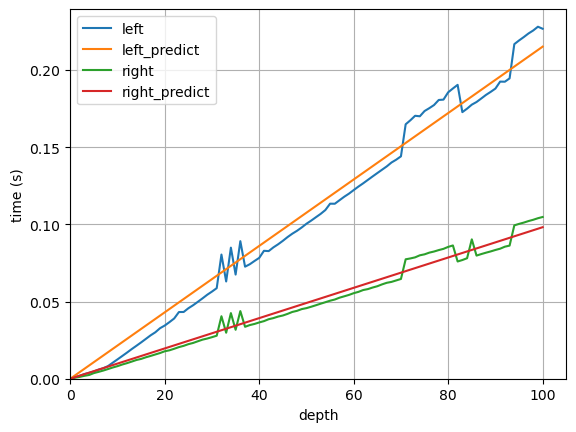

In [83]:
import matplotlib.pyplot as plt

plt.plot(x, y1 - y1[0], label='left')
plt.plot(x, y1_pred - y1[0], label='left_predict')
plt.plot(x, y2 - y2[0], label='right')
plt.plot(x, y2_pred - y2[0], label='right_predict')
plt.ylabel('time (s)')
plt.xlabel('depth')
plt.legend()
plt.grid()
plt.xlim(0)
plt.ylim(0)

(0.0, 2.567797168030935)

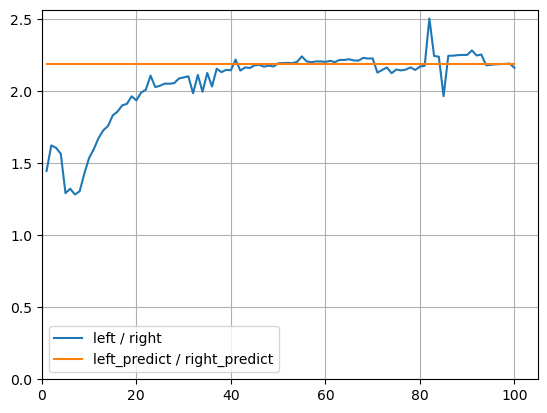

In [84]:
plt.plot(x[1:], (y1 - y1[0])[1:] / (y2 - y2[0])[1:], label='left / right')
plt.plot(x[1:], (y1_pred - y1[0])[1:] / (y2_pred - y2[0])[1:], label='left_predict / right_predict')
plt.legend()
plt.grid()
plt.xlim(0)
plt.ylim(0)